In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import shapefile

import folium
from folium.plugins import MarkerCluster

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

geolocator = Nominatim(user_agent="vv")

In [2]:
# Timestamp
from datetime import date

today = date.today() # date object
# Format
time_stamp = today.strftime("%m-%d-%Y")

In [3]:
df_testing_sites = pd.read_csv('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/Raw Data/laboratories.csv')
df_testing_sites.head()

,health_facility,stage,testing_capacity
0,Research Institute for Tropical Medicine,5,900.0
1,Baguio General Hospital and Medical Center,5,150.0
2,San Lazaro Hospital,5,100.0
3,Vicente Sotto Memorial Medical Center,5,240.0
4,Southern Philippines Medical Center,5,100.0


### Addresses not known

TB Reference Center CHD

Metro Pacific Hospital Holdings, Inc. - Muntinlupa

In [4]:
# Removing

df_testing_sites.drop(df_testing_sites.index[[47,58]], inplace=True)
df_testing_sites.index = [i for i in range(0, len(df_testing_sites))]

with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_testing_sites)

,health_facility,stage,testing_capacity
0,Research Institute for Tropical Medicine,5,900.0
1,Baguio General Hospital and Medical Center,5,150.0
2,San Lazaro Hospital,5,100.0
3,Vicente Sotto Memorial Medical Center,5,240.0
4,Southern Philippines Medical Center,5,100.0
5,UP National Institute of Health,5,80.0
6,Lung Center of the Philippines,5,100.0
7,Western Visayas Medical Center,5,80.0
8,Bicol Public Health Laboratory,5,NaN
9,St. Luke's Medical Center - Quezon City,5,NaN


# Cleaning

In [5]:
# UP National Institute of Health -> UP Manila
df_testing_sites.replace(to_replace ="UP National Institute of Health", value ="UP Manila", inplace=True) 

df_testing_sites.replace(to_replace ="Tarlac Provincial Lab", value ="Tarlac Provincial Hospital", inplace=True) 

df_testing_sites.replace(to_replace ="New World Diagnostics", value ="New World Diagnostics Quezon City", inplace=True) 

df_testing_sites.replace(to_replace ="Philippine Red Cross", 
                         value ="Philippine Red Cross National Headquarters", inplace=True) 

df_testing_sites.replace(to_replace ="Dr. Jorge P. Royeca City Hospital", value ="Dr. Jorge P. Royeca Hospital", inplace=True) 

df_testing_sites.replace(to_replace ="Victoriano Luna Hospital", value ="Victoriano Luna Medical Center", inplace=True) 

df_testing_sites.replace(to_replace ="Bicol Public Health Laboratory", 
           value ="Bicol Regional Diagnostic and Reference Laboratory", inplace=True) 

# St. Luke's Medical Center Global City
df_testing_sites.replace(to_replace ="St. Luke's Medical Center - BGC", value ="St. Luke's Medical Center Global City", inplace=True) 

df_testing_sites.replace(to_replace ="Philippine Genome Center, UP Diliman", 
           value ="Philippine Genome Center", inplace=True) 

df_testing_sites.replace(to_replace ="Laguna Provincial Hospital", 
           value ="Laguna Medical Center", inplace=True) 

# The Medical City
df_testing_sites.replace(to_replace ="The Medical City", value ="The Medical City Ortigas", inplace=True) 

# Molecular Diagnostics Laboratory -> High Pointe Medical Hub
df_testing_sites.replace(to_replace ="Molecular Diagnostics Laboratory", value ="Health Cube Medical Clinics", inplace=True) 

# Governor Celestino Gallares Memorial Medical Center -> Memorial Hospital
df_testing_sites.replace(to_replace ="Governor Celestino Gallares Memorial Medical Center", 
           value ="Governor Celestino Gallares Memorial Hospital", inplace=True) 

# and Medical Center
df_testing_sites.replace(to_replace ="Chinese General Hospital", 
           value ="Chinese General Hospital and Medical Center", inplace=True) 

# Mariano Marcos Hospital and Medical Center
df_testing_sites.replace(to_replace ="Mariano Marcos Hospital and Medical Center", 
           value ="Mariano Marcos Memorial Hospital and Medical Center", inplace=True) 

# De La Salle Medical and Health Sciences Institute - Center for Tuberculosis Laboratory
df_testing_sites.replace(to_replace ="De La Salle Medical and Health Sciences Institute - Center for Tuberculosis Laboratory", 
           value ="De La Salle Medical and Health Sciences Institute", inplace=True) 

df_testing_sites.replace(to_replace ="Zamboanga City Medical Center - Clinical Laboratory", 
           value ="Zamboanga City Medical Center", inplace=True) 

df_testing_sites.replace(to_replace ="Department of Agriculture Field Office - Zamboanga", 
           value ="Department of Agriculture (RSO-Zamboanga City)", inplace=True) 

df_testing_sites.replace(to_replace ="Philippine Genome Center, UP Mindanao", 
           value ="University of the Philippines Mindanao", inplace=True) 

df_testing_sites.replace(to_replace ="San Pablo College and Medical Center", 
           value ="San Pablo Colleges Medical Center", inplace=True) 

df_testing_sites.replace(to_replace ="Kaiser Medical Center, Inc.", 
           value ="Kaiser Medical Center, Philippines", inplace=True) 

df_testing_sites.replace(to_replace ="Green City Medical Center", 
           value ="GreenCity Medical Center", inplace=True) 

df_testing_sites.replace(to_replace ="Divine Word Hospital", 
           value ="Divine Word Hospital, Bulacan", inplace=True) 

# Geocoding

In [6]:
def do_geocode(g):
    try:
        loc = geolocator.geocode(g)
        print(loc.address)
        return loc
    except GeocoderTimedOut:
        return do_geocode(g)

In [7]:
df_testing_sites['coordinates'] = df_testing_sites['health_facility'].apply(do_geocode).apply(lambda x: (x.latitude, x.longitude))

Research Institute for Tropical Medicine, Corporate Woods Avenue, Alabang, Muntinlupa, Metro Manila, 1781, Philippines
Baguio General Hospital & Medical Center, Kennon Road, Poliwes, Baguio City, Benguet, Cordillera Administrative Region, 2600, Philippines
San Lazaro Hospital, Quiricada Street, Barangay 325, Santa Cruz, Third District, Manila, Metro Manila, 1003, Philippines
Vicente Sotto Memorial Medical Center, C. Rodriguez, Sacred Village, Sambag II, Cebu City, Cebu, Central Visayas, 6000, Philippines
Southern Philippines Medical Center, J. P. Laurel Avenue, De Jesus Subdivision, Vita Residences, Davao City, Davao Region, 8000, Philippines
UP Manila, Maria Y. Orosa, Barangay 670, Ermita, Fifth District, Manila, Metro Manila, 1000, Philippines
Lung Center of the Philippines, Quezon Avenue, East Triangle, Pinyahan, Quezon City, 4th District, Metro Manila, 1100, Philippines
Western Visayas Medical Center, Q. Abeto St., Mandurriao, Iloilo City, Iloilo, Western Visayas, 5000, Philippines

GreenCity Medical Center, Jose Abad Santos Avenue, Gems Ville Subdivision Phase 2, Dolores Heights Subdivision, San Fernando, Pampanga, Central Luzon, 20, Philippines
Tarlac Provincial Hospital, West Fairlane, Fairlane Subd., Camp General Servillano S. Aquino, Tarlac City, Tarlac, Central Luzon, 2300, Philippines
Zamboanga del Sur Medical Center, Dao Road, Lasaran, Purok Bahada, Dao, Zamboanga del Sur, Zamboanga Peninsula, 7016, Philippines
New World Diagnostics, D. Tuazon, Maharlika, Santa Mesa Heights, 1st District, Metro Manila, 1115, Philippines
Amai Pakpak Medical Center, Amai Pakpak Avenue, Marawi, Lanao del Sur, Bangsamoro Autonomous Region in Muslim Mindanao, 09700, Philippines
General Santos City Hospital, Eusebio Fernandez Street, Naval, General Santos, Soccsksargen, 9500, Philippines
Pasig Doctors Medical Center, Tramo, Cruz-Robles, Manggahan, Pasig, Metro Manila, 1611, Philippines
ARC Hospitals, Mactan Circumferential Road, White Sands Subdivision, Basak, Agus, Cebu, Centra

In [8]:
df_testing_sites[:15]

,health_facility,stage,testing_capacity,coordinates
0,Research Institute for Tropical Medicine,5,900.0,"(14.41000685, 121.03714354240603)"
1,Baguio General Hospital and Medical Center,5,150.0,"(16.4011964, 120.59612393285582)"
2,San Lazaro Hospital,5,100.0,"(14.614117, 120.98058146200714)"
3,Vicente Sotto Memorial Medical Center,5,240.0,"(10.30803345, 123.89154235860572)"
4,Southern Philippines Medical Center,5,100.0,"(7.09978495, 125.61950634691405)"
5,UP Manila,5,80.0,"(14.57913365, 120.98351328507022)"
6,Lung Center of the Philippines,5,100.0,"(14.64748145, 121.04587919677965)"
7,Western Visayas Medical Center,5,80.0,"(10.71881145, 122.54178735438887)"
8,Bicol Regional Diagnostic and Reference Labora...,5,NaN,"(13.146641200000001, 123.72344056451331)"
9,St. Luke's Medical Center - Quezon City,5,NaN,"(14.6230026, 121.0231956)"


# Folium

In [9]:
m = folium.Map(location=[np.mean([i[0] for i in df_testing_sites.coordinates]), np.mean([i[1] for i in df_testing_sites.coordinates])], 
               tiles='https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}{r}.png',
                attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>', 
               zoom_start=5.4)
mc = MarkerCluster()

def mapper(stage,color,icon='default'):
    # Getting the coordinates of each facility
    coords = [i for i in df_testing_sites[df_testing_sites.stage==stage].copy().coordinates]
    
    # Name of each facility with its status
    facilities = [i + '\nStage: {}'.format(str(stage)) for i in np.array(df_testing_sites[df_testing_sites.stage==stage].copy().health_facility)]
    
    #np.array(df_testing_sites[df_testing_sites.stage==stage].copy().health_facility)
    for coord, facility in zip(coords, facilities):
        folium.Marker(coord, radius=6, popup=facility, icon=folium.Icon(color=color,icon=icon)).add_to(mc)

# Stage 1
mapper(1, 'orange')

# Stage 2
mapper(2, 'blue')

# Stage 3
mapper(3, 'purple')

# Stage 4
mapper(4, 'green')

# Stage 5
mapper(5, 'red', 'star')


# Legend

m.add_child(mc)
m

In [10]:
m.save('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/images/labs.html')

# Philippine Map with map inset

<IPython.core.display.Javascript object>


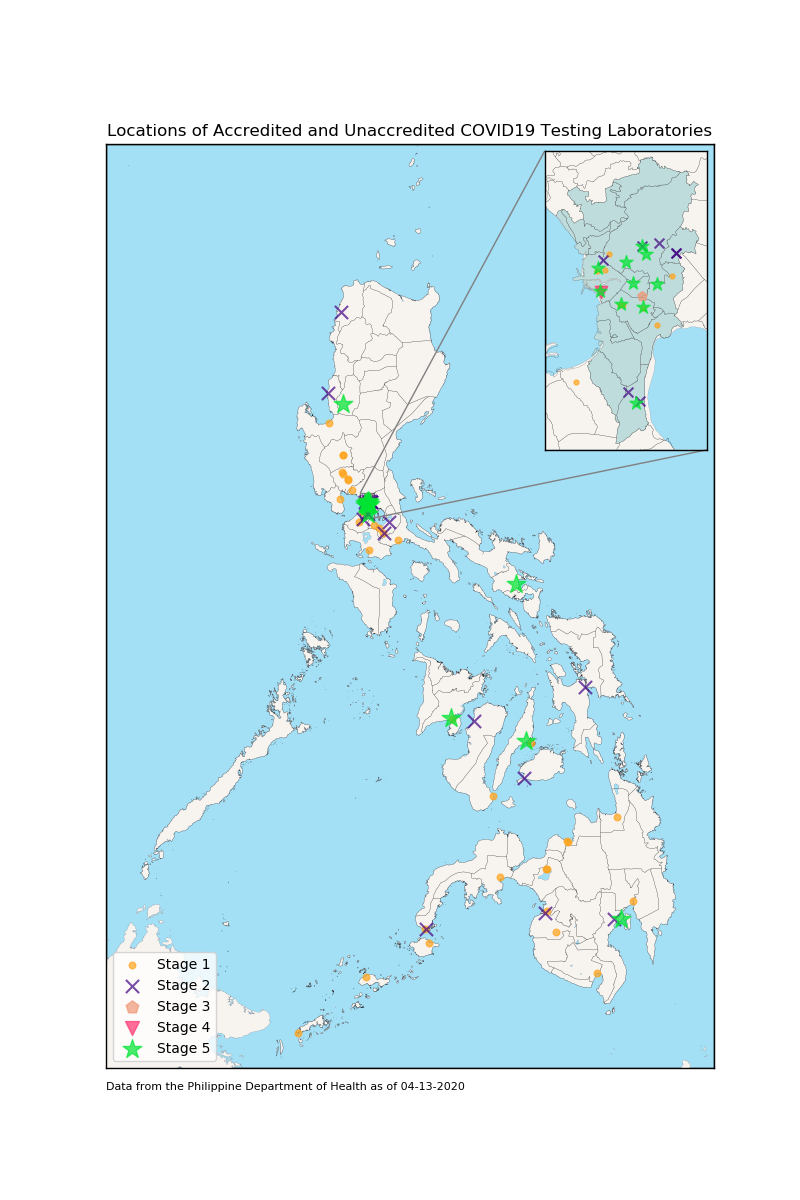

C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':
C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\tonba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\tonba\AppData\Local\Con

Text(116.3, 4, 'Data from the Philippine Department of Health as of 04-13-2020')

In [11]:
import matplotlib

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111)

reso = 'f'
plt.title('Locations of Accredited and Unaccredited COVID19 Testing Laboratories')
m = Basemap(llcrnrlon=116.3,llcrnrlat=4.4, urcrnrlon=127.3, urcrnrlat=21.1, resolution=reso, 
            lat_0 = 14, lon_0 = 120, ax=ax) 

# Design
m.fillcontinents(color='#F7F4F0', lake_color='#a3dff5')
m.drawmapboundary(fill_color='#a3dff5')
m.drawcoastlines(color='#555566', linewidth=0.1)

# Reading the shapefile
m.readshapefile('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/Shapefiles/gadm36_PHL_1',
                'shf', linewidth=0.1, drawbounds = True)

# Conversion of lats longs wrt to the projection
def testing_scatter(map_, axis_, n, marker, label, size, color):
    lats = [i[0] for i in df_testing_sites[df_testing_sites.stage == n].coordinates]
    longs = [i[1] for i in df_testing_sites[df_testing_sites.stage == n].coordinates]
    xpt, ypt = map_(longs, lats)
    return axis_.scatter(xpt, ypt, c=color, zorder=10, marker=marker, alpha=.7, s=size, label=label)

testing_scatter(m, ax, 1, '.', 'Stage 1', 90, color='#ffa41b')
testing_scatter(m, ax, 2, 'x', 'Stage 2', 90, color='#400082')
testing_scatter(m, ax, 3, 'p', 'Stage 3', 90, color='#f09675')
testing_scatter(m, ax, 4, 'v', 'Stage 4', 100, color='#fe346e')
testing_scatter(m, ax, 5, '*', 'Stage 5', 200, color='#01e432')
ax.legend(loc=3)


# Map inset of Metro Manila
axins = zoomed_inset_axes(m.ax, 12, loc=1)#bbox_to_anchor=(700,1020)
m2 = Basemap(llcrnrlon=120.9, llcrnrlat=14.34, urcrnrlon=121.145, urcrnrlat=14.79, 
             resolution=reso, lat_0 = 14.34, lon_0 = 121, ax=axins) 
m2.fillcontinents(color='#F7F4F0', lake_color='#a3dff5')
m2.drawmapboundary(fill_color='#a3dff5')
m2.drawcoastlines(color='#555566', linewidth=0.1)

# Reading the provincial shapefile
m2.readshapefile('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/Shapefiles/gadm36_PHL_2',
                'shf', linewidth=0.1,  drawbounds=False)
# Highlight Manila
patches = []
for info, shape in zip(m2.shf_info, m2.shf):
    if info['NAME_1'] == 'Metropolitan Manila':
        patches.append(Polygon(np.array(shape), True))        
axins.add_collection(PatchCollection(patches, facecolor='#bedcdc', linewidths=0.1, zorder=2))

# Drawing the shapefile
m2.readshapefile('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/Shapefiles/gadm36_PHL_2',
                'shf', linewidth=0.1, drawbounds = True)

# Plotting
testing_scatter(m2, axins, 1, '.', 'Stage 1', 50, color='#ffa41b')#Self-Assessment
testing_scatter(m2, axins, 2, 'x', 'Stage 2', 50, color='#400082')#Validation
testing_scatter(m2, axins, 3, 'p', 'Stage 3', 50, color='#f09675')#Personnel Training
testing_scatter(m2, axins, 4, 'v', 'Stage 4', 80, color='#fe346e')#Proficiency Testing
testing_scatter(m2, axins, 5, '*', 'Stage 5', 100, color='#01e432')#Fullscale Implementation

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

ax.text(116.3, 4, 'Data from the Philippine Department of Health as of {}'.format(time_stamp), fontsize=8)

In [12]:
fig.savefig('C:/Users/tonba/Desktop/Masters Stuff/Projects/COVID19/COVID19_PH_Project/images/locs_of_testing_sites_{}'.format(time_stamp), dpi=800, bbox_inches='tight')#